### ***Data manipulation***
   Reading a csv file
   
```import pandas as pd```

```df=pd.read_csv("offshoreleaks.csv")```

   Access to columns
   
```df["<column_name>"]```

   Filtering
   
```df[df["<column_name>"]=="<value>"]```

   Statistics on one column
   
```df["<column_name>"].value_counts()```

### ***Exercise n° 1***

In [1]:
import pandas
pandas.__version__

'1.3.4'

### Question n°1
How many countries were declared in the offshore leaks? (nodes-addresses.csv)

In [21]:
import pandas as pd

df=pd.read_csv("nodes-addresses.csv", low_memory=False)
len(df["countries"].value_counts())

237

### Question n°2
In how many entries does the word "Ireland" appear? (nodes-addresses.csv)

In [19]:
import pandas as pd

df=pd.read_csv("nodes-addresses.csv", low_memory=False)
len(df[df["countries"]=="Ireland"])

899

### Question n°3
In how many montages does "EL PORTADOR" appear? (nodes-officers.csv)

In [20]:
import pandas as pd

df=pd.read_csv("nodes-officers.csv", low_memory=False)
len(df[df["name"]=="EL PORTADOR"])

9325

### ***Using Seaborn***
```import seaborn as sns```

```sns.countplot(x="<name_column>", data=df)```

### ***Exercise n° 2***

In [19]:
import seaborn as sns
sns.__version__

'0.11.2'

### Question n° 4
Make a histogram of the countries that have been declared in the offshore leaks

<AxesSubplot:xlabel='countries', ylabel='count'>

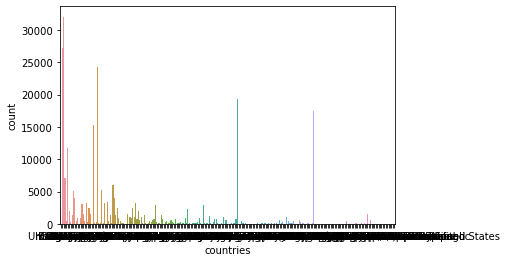

In [9]:
import seaborn as sns
import pandas as pd

df=pd.read_csv("nodes-addresses.csv", low_memory=False)
sns.countplot(x="countries", data=df)

### Question n°5
Are we in the presence of a normal law if not what is the top 20 of the most declared countries?

In [17]:
import seaborn as sns
import pandas as pd

df=pd.read_csv("nodes-addresses.csv", low_memory=False)
df["countries"].value_counts()[:20]

China                     32067
Hong Kong                 27179
United States             24248
Barbados                  19344
Aruba                     17512
Taiwan                    15326
United Kingdom            11706
Singapore                  7149
Russia                     5963
British Virgin Islands     5282
Switzerland                5113
Jersey                     3932
Bermuda                    3920
Indonesia                  3412
United Arab Emirates       3283
Panama                     3257
Malaysia                   3241
Canada                     3139
Brazil                     2979
Cyprus                     2842
Name: countries, dtype: int64

### ***Reconstruction de la base de données***
Merge the dataframes according to the graph to have on the same dataframe the following subgraph "officer --- officer of ---> entity".

In [28]:
import pandas as pd

relations=pd.read_csv("relationships.csv", low_memory=False)
relations=relations[relations["_type"] == "officer_of"]

officers=pd.read_csv("nodes-officers.csv", low_memory=False)
merge=pd.merge(officers, relations, left_on='_id', right_on='_start')

entities=pd.read_csv("nodes-entities.csv", low_memory=False)
pd.merge(entities, merge, left_on='_id', right_on='_end')

,_id_x,node_id_x,name_x,original_name,former_name,jurisdiction,jurisdiction_description,company_type,address,internal_id,...,valid_until_y,note_y,_start,_end,_type,link,status_y,start_date,end_date,sourceID_y
0,0,10000001,"TIANSHENG INDUSTRY AND TRADING CO., LTD.","TIANSHENG INDUSTRY AND TRADING CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001256.0,...,The Panama Papers data is current through 2015,NaN,388171,0,officer_of,shareholder of,NaN,23-MAR-2006,NaN,Panama Papers
1,0,10000001,"TIANSHENG INDUSTRY AND TRADING CO., LTD.","TIANSHENG INDUSTRY AND TRADING CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001256.0,...,The Panama Papers data is current through 2015,NaN,429978,0,officer_of,shareholder of,NaN,23-MAR-2006,NaN,Panama Papers
2,1,10000002,"NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.","NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001263.0,...,The Panama Papers data is current through 2015,NaN,388171,1,officer_of,shareholder of,NaN,27-MAR-2006,NaN,Panama Papers
3,1,10000002,"NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.","NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001263.0,...,The Panama Papers data is current through 2015,NaN,430722,1,officer_of,shareholder of,NaN,27-MAR-2006,NaN,Panama Papers
4,2,10000003,"HOTFOCUS CO., LTD.","HOTFOCUS CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1000896.0,...,The Panama Papers data is current through 2015,NaN,388171,2,officer_of,shareholder of,NaN,10-JAN-2006,NaN,Panama Papers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686128,1966846,55034110,YUSTAT SHIPPING 4 LIMITED,NaN,NaN,MLT,Malta,NaN,NaN,NaN,...,Malta corporate registry data is current throu...,NaN,1812217,1966846,officer_of,judicial representative of,NaN,NaN,NaN,Paradise Papers - Malta corporate registry
1686129,1969303,240039001,Klamart Limited,NaN,NaN,BLZ,Belize,NaN,NaN,NaN,...,Pandora Papers - Alcogal data is current throu...,NaN,1969304,1969303,officer_of,"President, Director",NaN,NaN,NaN,"Pandora Papers - Alemán, Cordero, Galindo & Le..."
1686130,1969303,240039001,Klamart Limited,NaN,NaN,BLZ,Belize,NaN,NaN,NaN,...,Pandora Papers - Alcogal data is current throu...,NaN,1969305,1969303,officer_of,Power of Attorney,NaN,16-JAN-2006,NaN,"Pandora Papers - Alemán, Cordero, Galindo & Le..."
1686131,1969303,240039001,Klamart Limited,NaN,NaN,BLZ,Belize,NaN,NaN,NaN,...,Pandora Papers - Alcogal data is current throu...,NaN,1969306,1969303,officer_of,Power of Attorney,NaN,16-JAN-2006,NaN,"Pandora Papers - Alemán, Cordero, Galindo & Le..."


### ***Exercise n°3***

### Question n°6
How many service providers have been declared in the offshore leaks and what is the proportion of these service providers vis-à-vis officers?

In [2]:
import pandas as pd

adress=pd.read_csv("nodes-addresses.csv", low_memory=False)
relations=pd.read_csv("relationships.csv", low_memory=False)
officers=pd.read_csv("nodes-officers.csv", low_memory=False)
entities=pd.read_csv("nodes-entities.csv", low_memory=False)

relations_leaks=relations[relations["_type"] == "registered_address"]
merge_leaks=pd.merge(entities, relations_leaks, left_on='_id', right_on='_start')
merge_leaks=pd.merge(adress, merge_leaks, left_on='_id', right_on='_end')
#print(merge_leaks["service_provider"].value_counts())
#print("Number of service providers : " + str(len(merge_leaks["service_provider"].value_counts())))

relations=relations[relations["_type"] == "officer_of"]
merge_officers=pd.merge(officers, relations, left_on='_id', right_on='_start')
merge_officers=pd.merge(entities, merge_officers, left_on='_id', right_on='_end')
print(merge_officers["service_provider"].value_counts())
print("Number of officers : " + str(len(merge_officers)))

Mossack Fonseca               309357
Appleby                       240495
Portcullis Trustnet           226339
Commonwealth Trust Limited     62342
Name: service_provider, dtype: int64
Number of officers : 1686133
